# Model Evaluation

## EDA

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving TravelInsurancePrediction.csv to TravelInsurancePrediction.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df = pd.read_csv('TravelInsurancePrediction.csv')

df.drop(columns=['Unnamed: 0'],inplace=True)
df = df.rename(columns={"Employment Type": "EmploymentType"})

nums = ['Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases', 'TravelInsurance']
cats = ['EmploymentType', 'GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad']
#Handle duplicated data
df.drop_duplicates(inplace=True) 
#feature encoding
df['EmploymentType'].replace(['Government Sector', 'Private Sector/Self Employed'], [0, 1], inplace=True)
df['GraduateOrNot'].replace(['No', 'Yes'], [0, 1], inplace=True)
df['FrequentFlyer'].replace(['No', 'Yes'], [0, 1], inplace=True)
df['EverTravelledAbroad'].replace(['No', 'Yes'], [0, 1], inplace=True)

## Feature Transformation

In [ ]:
#log income
df['log_AnnualIncome'] = np.log(df['AnnualIncome'])
#Normalisasi Annual Income
df['log_AnnualIncomes_norm'] = MinMaxScaler().fit_transform(df['log_AnnualIncome'].values.reshape(len(df), 1))
#Standarisasi Annual Income
df['log_AnnualIncomes_std'] = StandardScaler().fit_transform(df['log_AnnualIncome'].values.reshape(len(df), 1))

In [ ]:
#Age
#Standarisasi
df['Age_std'] = StandardScaler().fit_transform(df['Age'].values.reshape(len(df), 1))
#normalisasi
df['Age_norm'] = MinMaxScaler().fit_transform(df['Age'].values.reshape(len(df), 1))

In [ ]:
#FamilyMembers
#Standardisasi
df['FamilyMembers_std'] = StandardScaler().fit_transform(df['FamilyMembers'].values.reshape(len(df), 1))
#Normalisasi
df['FamilyMembers_norm'] = MinMaxScaler().fit_transform(df['FamilyMembers'].values.reshape(len(df), 1))

## Feature Engineering

In [ ]:
## annual income above
def income(row):
    if row['AnnualIncome'] > 1300000:
        return 1
    else:
        return 0
    
df['IncomeAbove1300'] = df.apply(income, axis=1)
df['IncomeAbove1300'].value_counts()

0    1055
1     194
Name: IncomeAbove1300, dtype: int64

In [ ]:
# maybe can define "Seasoned Traveler" by those who have travelled abroad and is a frequent flyer??
def travel(row):
    if row['FrequentFlyer'] == 1 and row['EverTravelledAbroad'] == 1:
        return 1
    else:
        return 0
    
df['SeasonedTraveler'] = df.apply(travel, axis=1)
df['SeasonedTraveler'].value_counts()

0    1148
1     101
Name: SeasonedTraveler, dtype: int64

In [ ]:
def FourCrit(row):
    if (row['AnnualIncome'] > 1300000) and (row['EmploymentType'] == 1) and (row['EverTravelledAbroad'] == 1) and (row['FrequentFlyer'] == 1):
        return 1
    else:
        return 0
df['FourCrits'] = df.apply(FourCrit, axis=1)
df['FourCrits'].value_counts()

0    1175
1      74
Name: FourCrits, dtype: int64

In [ ]:
def risk(row):
    if row['ChronicDiseases'] == 1 and (row['Age'] > 33):
        return 1
    else:
        return 0
    
df['RiskyCategory'] = df.apply(risk, axis=1)
df['RiskyCategory'].value_counts()

0    1183
1      66
Name: RiskyCategory, dtype: int64

In [ ]:
# Big family, big spendings
def f(row):
    if row['AnnualIncome'] > 800000 and row['FamilyMembers'] >= 5:
        return 1
    else:
        return 0
    
df['BigFamily'] = df.apply(f, axis=1)
df['BigFamily'].value_counts()

0    866
1    383
Name: BigFamily, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249 entries, 0 to 1985
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     1249 non-null   int64  
 1   EmploymentType          1249 non-null   int64  
 2   GraduateOrNot           1249 non-null   int64  
 3   AnnualIncome            1249 non-null   int64  
 4   FamilyMembers           1249 non-null   int64  
 5   ChronicDiseases         1249 non-null   int64  
 6   FrequentFlyer           1249 non-null   int64  
 7   EverTravelledAbroad     1249 non-null   int64  
 8   TravelInsurance         1249 non-null   int64  
 9   log_AnnualIncome        1249 non-null   float64
 10  log_AnnualIncomes_norm  1249 non-null   float64
 11  log_AnnualIncomes_std   1249 non-null   float64
 12  Age_std                 1249 non-null   float64
 13  Age_norm                1249 non-null   float64
 14  FamilyMembers_std       1249 non-null   

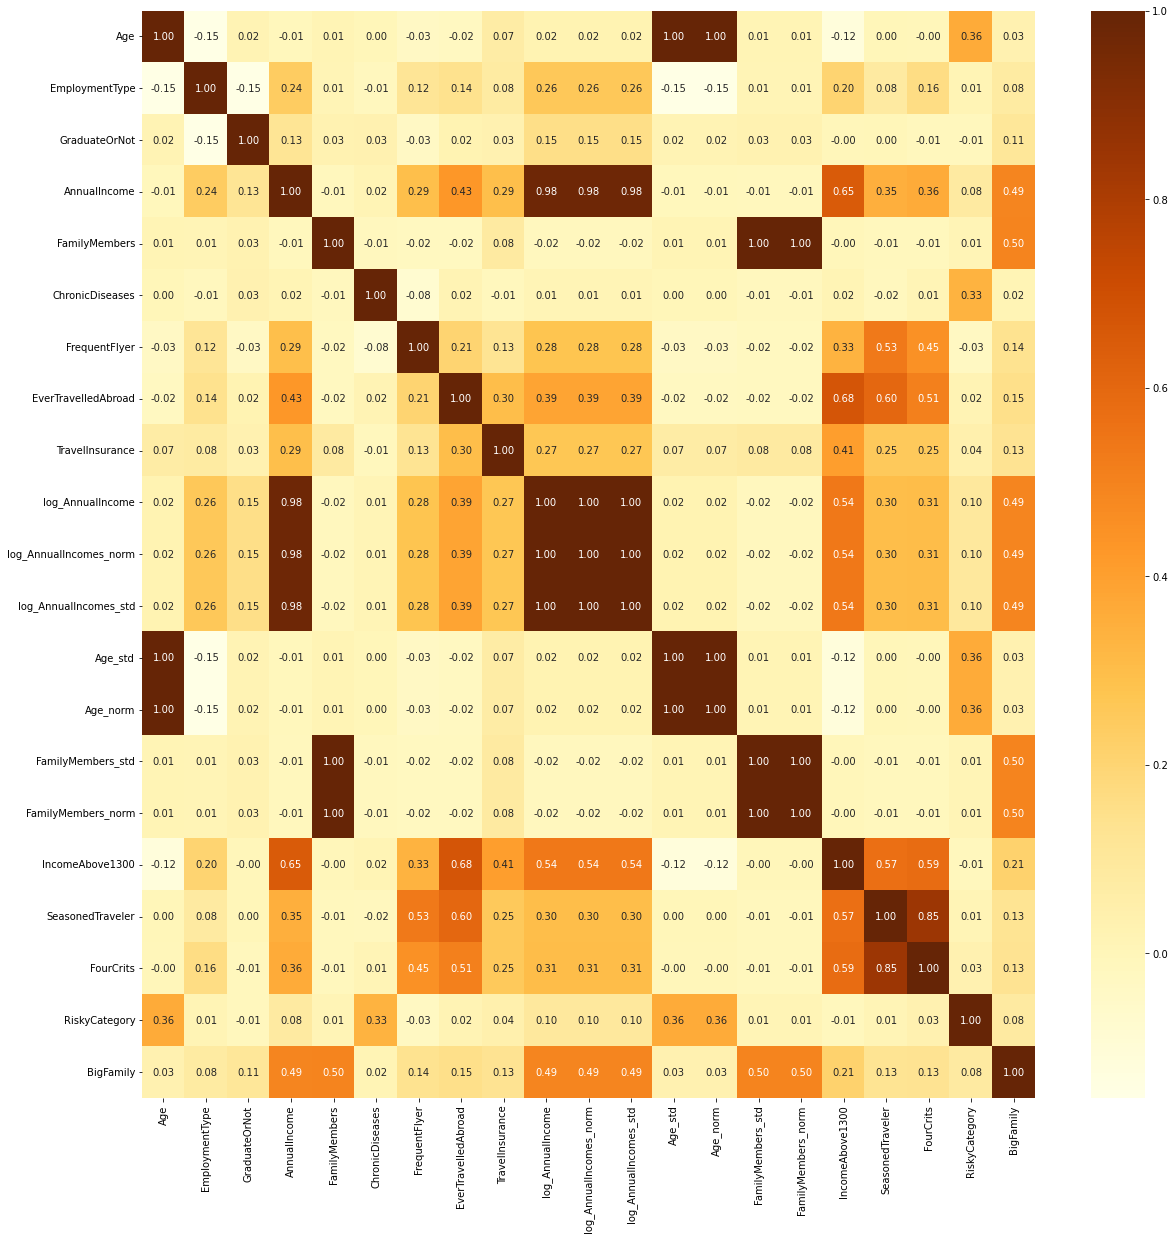

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap='YlOrBr', annot=True, fmt='.2f')

# Modelling

## Prep for Modelling
(kalau butuh import2 coba di sini)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
def eval_classification(model, xtrain, ytrain, xtest, ytest):
    ypred = model.predict(xtest)
    print("ROC AUC Score: %.2f" % roc_auc_score(y_test, y_pred) )
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, ypred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, ypred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, ypred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, ypred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
    print('Test score:' + str(model.score(X_test, y_test))) #accuracy
   
    y_pred_proba = model.predict_proba(xtest)
    print("AUC: %.2f" % roc_auc_score(ytest, y_pred_proba[:, 1]))

# Split Feature and Label


## MODEL

### Logistic Regression

In [ ]:
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
#X = df[['BigFamily', 'RiskyCategory', 'FourCrits', 'SeasonedTraveler', 'IncomeAbove1300']]
#X = df[['Age', 'AnnualIncome', 'FamilyMembers']]
#X = df[['log_AnnualIncomes_norm', 'Age_norm', 'FamilyMembers_norm', 'FrequentFlyer', 'EverTravelledAbroad']]
X = df[['log_AnnualIncomes_std', 'FrequentFlyer', 'EverTravelledAbroad', 'Age_std', 'FamilyMembers_std']]
y = df['TravelInsurance']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    #print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    #print("AUC (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    print("AUC (test-label): %.2f" % roc_auc_score(y_test, y_pred))
    print("AUC (train-label): %.2f" % roc_auc_score(y_train, y_pred_train))

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [ ]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression() 
lr.fit(X_train, y_train) 
eval_classification(lr) 

Accuracy (Test Set): 0.70
Precision (Test Set): 0.70
Recall (Test Set): 0.39
F1-Score (Test Set): 0.50
AUC (test-label): 0.64
AUC (train-label): 0.64


In [ ]:
from sklearn.model_selection import RandomizedSearchCV 
hyperparams = dict(C = [0.0001, 0.001, 0.01, 0.02, 0.03], 
                   penalty = ['l1', 'l2'], 
                   solver = ['lbfgs','liblinear'])

lr = LogisticRegression() 
rs = RandomizedSearchCV(lr, hyperparams, cv=10, scoring='roc_auc', random_state=42) 
rs.fit(X_train, y_train) 
eval_classification(rs) 

Accuracy (Test Set): 0.73
Precision (Test Set): 0.80
Recall (Test Set): 0.39
F1-Score (Test Set): 0.52
AUC (test-label): 0.66
AUC (train-label): 0.64


In [ ]:
show_best_hyperparameter(rs)

{'C': 0.03, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


### Decission Tree

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    print("AUC (test-label): %.2f" % roc_auc_score(y_test, y_pred))
    print("AUC (train-label): %.2f" % roc_auc_score(y_train, y_pred_train))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [ ]:
X = df[['Age', 'EmploymentType','GraduateOrNot','AnnualIncome','FamilyMembers','ChronicDiseases','FrequentFlyer','EverTravelledAbroad']]
y = df['TravelInsurance'] # target / label

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify=y, test_size=0.3)

print("Feature Variables: ")
print(X.info())

Feature Variables: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249 entries, 0 to 1985
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Age                  1249 non-null   int64
 1   EmploymentType       1249 non-null   int64
 2   GraduateOrNot        1249 non-null   int64
 3   AnnualIncome         1249 non-null   int64
 4   FamilyMembers        1249 non-null   int64
 5   ChronicDiseases      1249 non-null   int64
 6   FrequentFlyer        1249 non-null   int64
 7   EverTravelledAbroad  1249 non-null   int64
dtypes: int64(8)
memory usage: 87.8 KB
None


In [ ]:
#import sklearn DT and create decision tree function
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeClassifier()

#fitting the model
dt_model.fit(X_train, y_train)

#Checking the training score
dt_model.score(X_train, y_train)

#checking the testing score
dt_model.score(X_test, y_test)

eval_classification(dt_model)

Accuracy (Test Set): 0.62
Precision (Test Set): 0.51
Recall (Test Set): 0.46
F1-Score (Test Set): 0.48
AUC (test-proba): 0.58
AUC (train-proba): 0.99
AUC (test-label): 0.59
AUC (train-label): 0.90


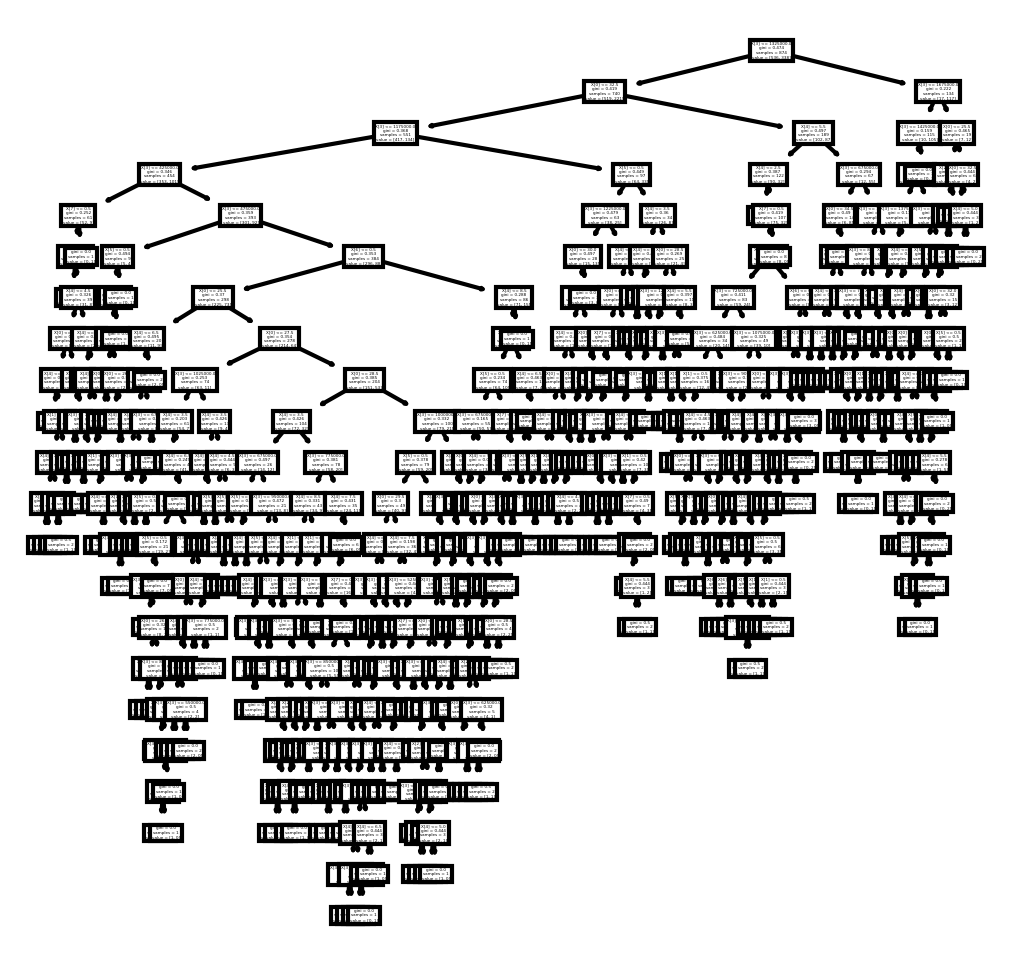

In [ ]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(dt_model);

### Random Forest

In [ ]:
X = df[['Age','AnnualIncome','FamilyMembers','EverTravelledAbroad','IncomeAbove1300']]
y = df['TravelInsurance']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
#     print("AUC (test-label): %.2f" % roc_auc_score(y_test, y_pred))
#     print("AUC (train-label): %.2f" % roc_auc_score(y_train, y_pred_train))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [ ]:
df.TravelInsurance.value_counts(normalize=True)

0    0.613291
1    0.386709
Name: TravelInsurance, dtype: float64

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
eval_classification(rf)

Accuracy (Test Set): 0.66
Precision (Test Set): 0.56
Recall (Test Set): 0.51
F1-Score (Test Set): 0.54
AUC (test-proba): 0.68
AUC (train-proba): 0.95


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

hyperparams = dict(
                    n_estimators = [int(x) for x in np.linspace(10, 1000, num=100)],
                    criterion = ['gini', 'entropy'],
                    max_depth = [int(x) for x in np.linspace(1, 1000, num=50)],
                    min_samples_split = [int(x) for x in np.linspace(2, 40, num=40)],
                    min_samples_leaf = [int(x) for x in np.linspace(2, 20, num=20)],
                    max_features = ['auto', 'sqrt', 'log2']
                    )

rf = RandomForestClassifier()
rs = RandomizedSearchCV(rf, hyperparams, cv=5, random_state=42, scoring='roc_auc')
rs.fit(X_train, y_train)
eval_classification(rs)

Accuracy (Test Set): 0.78
Precision (Test Set): 0.89
Recall (Test Set): 0.50
F1-Score (Test Set): 0.64
AUC (test-proba): 0.74
AUC (train-proba): 0.80


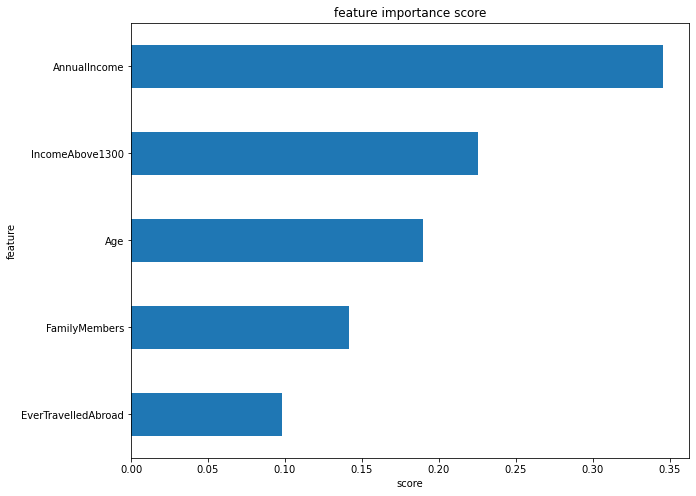

In [ ]:
show_feature_importance(rs.best_estimator_)

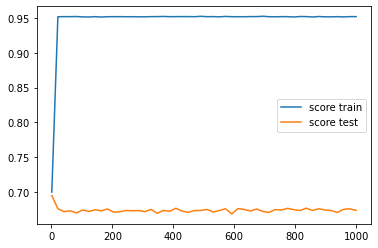

In [ ]:
# values = [int(x) for x in np.linspace(10, 1000, num=100)] # n_estimators
values = [int(x) for x in np.linspace(1, 1000, num=50)] # max_depth

train_score = []
test_score = []

for x in values:
    model = RandomForestClassifier(n_estimators=240, max_depth=x)
    model.fit(X_train, y_train)
    
    # eval test
    y_pred_proba = model.predict_proba(X_test)
    auc_test = roc_auc_score(y_test, y_pred_proba[:,1])
    test_score.append(auc_test)
    
    # eval test
    y_pred_proba_train = model.predict_proba(X_train)
    auc_train = roc_auc_score(y_train, y_pred_proba_train[:,1])
    train_score.append(auc_train)
    
#     print('k: '+ str(x) + '; auc(train): '+ str(auc_train) + '; auc(test): ' + str(auc_test))

from matplotlib import pyplot as plt
plt.plot(values, train_score, label='score train')
plt.plot(values, test_score, label='score test')
plt.legend()
plt.show()

### SVM

In [ ]:
# Split Feature and Label
X = df[['Age', 'EmploymentType','GraduateOrNot','AnnualIncome','FamilyMembers','ChronicDiseases','FrequentFlyer','EverTravelledAbroad']]
y= df['TravelInsurance'] # target / label

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print("Feature Variables: ")
print(X.info())

Feature Variables: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249 entries, 0 to 1985
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Age                  1249 non-null   int64
 1   EmploymentType       1249 non-null   int64
 2   GraduateOrNot        1249 non-null   int64
 3   AnnualIncome         1249 non-null   int64
 4   FamilyMembers        1249 non-null   int64
 5   ChronicDiseases      1249 non-null   int64
 6   FrequentFlyer        1249 non-null   int64
 7   EverTravelledAbroad  1249 non-null   int64
dtypes: int64(8)
memory usage: 87.8 KB
None


In [ ]:
model = SVC(kernel = 'poly',degree=5, probability=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.predict_proba(X_test)
y_pred_train = model.predict(X_train)

In [ ]:
eval_classification(model)

Accuracy (Test Set): 0.74
Precision (Test Set): 0.87
Recall (Test Set): 0.38
F1-Score (Test Set): 0.53
AUC (test-proba): 0.69
AUC (train-proba): 0.66


In [ ]:
# Split Feature and Label
X = df[['Age_std','IncomeAbove1300','FamilyMembers_norm']]
y= df['TravelInsurance'] # target / label

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print("Feature Variables: ")
print(X.info())

Feature Variables: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249 entries, 0 to 1985
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age_std             1249 non-null   float64
 1   IncomeAbove1300     1249 non-null   int64  
 2   FamilyMembers_norm  1249 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 39.0 KB
None


In [ ]:
model = SVC(kernel = 'poly',degree=5, probability=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.predict_proba(X_test)
y_pred_train = model.predict(X_train)
eval_classification(model)

Accuracy (Test Set): 0.78
Precision (Test Set): 0.88
Recall (Test Set): 0.49
F1-Score (Test Set): 0.62
AUC (test-proba): 0.71
AUC (train-proba): 0.73


### Neural Network

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    y_pred_proba = model.predict_proba(X_test)
    print("AUC: %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

In [ ]:
y_true =df[['TravelInsurance']]

#X = df[['Age', 'EmploymentType', 'GraduateOrNot', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad']]
X = df[['Age', 'EmploymentType', 'AnnualIncome', 'FrequentFlyer', 'EverTravelledAbroad']]
#X = df[['Age', 'EmploymentType', 'IncomeSegmentation', 'FrequentFlyer', 'EverTravelledAbroad']]
#X = df[['EmploymentType', 'IncomeSegmentation', 'FrequentFlyer', 'EverTravelledAbroad']]
#X = df[['Age', 'IncomeSegmentation', 'FamilyMembers']]
y = df[['TravelInsurance']]

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [ ]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=3,learning_rate_init=0.1,max_iter=100)

model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=3, learning_rate_init=0.1, max_iter=100)

In [ ]:
#y_pred = model.predict(X_test)
#y_pred
eval_classification(model, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.62
Precision (Test Set): 0.00
Recall (Test Set): 0.00
F1-Score (Test Set): 0.00
AUC: 0.50


### XGBOOST

In [ ]:
X = df[['Age', 'EmploymentType', 'GraduateOrNot', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad']]

y = df[['TravelInsurance']]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#1
from sklearn.model_selection import GridSearchCV 
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
# folds = 3
# skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                  silent=True, nthread=1)

# grid = GridSearchCV(estimator=xgb, param_grid=params, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train, y_train), verbose=3 )
grid = GridSearchCV(estimator=xgb, param_grid=params, scoring='roc_auc', n_jobs=4, verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(estimator=XGBClassifier(learning_rate=0.02, n_estimators=600,
                                     nthread=1, silent=True),
             n_jobs=4,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 1.5, 2, 5], 'max_depth': [3, 4, 5],
                         'min_child_weight': [1, 5, 10],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='roc_auc', verbose=3)

In [ ]:
#2
from sklearn.model_selection import GridSearchCV 
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
params = {'alpha': (0.1, 10), 'max_depth': (5, 10), 'learning_rate': (0.1, 1)}
# folds = 3
# skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                  silent=True, nthread=1)

# grid = GridSearchCV(estimator=xgb, param_grid=params, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train, y_train), verbose=3 )
grid = GridSearchCV(estimator=xgb, param_grid=params, scoring='roc_auc', n_jobs=4, verbose=3)
grid.fit(X_train,y_train)

In [ ]:
pip install tqdm

In [ ]:
# coba aja salah satu??? 1
print(grid.best_estimator_)
print(grid.best_estimator_.get_params()) 

In [ ]:
# coba aja salah satu??? 2
print(grid.best_estimator_)
print(grid.best_estimator_.get_params()) 

In [ ]:
#1
from sklearn.model_selection import GridSearchCV 
from xgboost import XGBClassifier

semua_weight = 10

model_xgboost = XGBClassifier(colsample_bytree=1.0, gamma=2, learning_rate=0.02,
              n_estimators=600, nthread=1, silent=True, subsample=1.0) #hyperparameter masukin sini

fitted = model_xgboost.fit(X_train, y_train)
y_pred = fitted.predict(X_test)
y_pred_train = fitted.predict(X_train)


y_pred_proba = fitted.predict_proba(X_test)
y_pred_proba_train = fitted.predict_proba(X_train)
conf_mat = confusion_matrix(y_test,y_pred)
print('-'*100)
print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))
print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
conf_mat = confusion_matrix(y_test,y_pred)
print(conf_mat)
print('='*100)
print()

In [ ]:
#2
from sklearn.model_selection import GridSearchCV 
from xgboost import XGBClassifier

semua_weight = 10

model_xgboost = XGBClassifier(colsample_bytree=1.0, gamma=2, learning_rate=0.02,
              n_estimators=600, nthread=1, silent=True, subsample=1.0) #hyperparameter masukin sini

fitted = model_xgboost.fit(X_train, y_train)
y_pred = fitted.predict(X_test)
y_pred_train = fitted.predict(X_train)


y_pred_proba = fitted.predict_proba(X_test)
y_pred_proba_train = fitted.predict_proba(X_train)
conf_mat = confusion_matrix(y_test,y_pred)
print('-'*100)
print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))
print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
conf_mat = confusion_matrix(y_test,y_pred)
print(conf_mat)
print('='*100)
print()

In [ ]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(8).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')
    return feat_importances

In [ ]:
show_feature_importance(model_xgboost)

In [ ]:
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, train_test_split, GridSearchCV 
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix, f1_score, precision_score, recall_score
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [ ]:
X = df[['Age', 'EmploymentType','GraduateOrNot','AnnualIncome','FamilyMembers','ChronicDiseases','FrequentFlyer','EverTravelledAbroad']]
y = df['TravelInsurance'] # target / label

#Splitting the data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler()
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [ ]:
clf = XGBClassifier()

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
params = {'alpha': (0.1, 10), 'max_depth': (5, 10), 'learning_rate': (0.1, 1)}
clf = GridSearchCV(clf, scoring='f1_micro', cv=cv, param_grid=params)
clf.fit(X_train, y_train)

In [ ]:
xgb = clf.best_estimator_
y_pred = xgb.predict(X_test)
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('XGBoost model F1 score: {0:0.4f}'. format(f1_score(y_test, y_pred)))
print('XGBoost model precision score: {0:0.4f}'. format(precision_score(y_test, y_pred)))
print('XGBoost model recall score: {0:0.4f}'. format(recall_score(y_test, y_pred)))

In [ ]:
plot_confusion_matrix(xgb, X_test, y_test)  
plt.show()

## KNN

In [ ]:
from tqdm import tqdm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
X = df[['Age','AnnualIncome','EverTravelledAbroad','FamilyMembers']]
y= df['TravelInsurance'] # target / label

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

jumlah_k = list(range(3,60,2))

for i in jumlah_k:
    modelKNN = KNeighborsClassifier(n_neighbors=i)
    print(f'Jumlah K: {i}')
    modelKNN.fit(X_train, y_train)
    y_pred = modelKNN.predict(X_test)
    print('-'*100)
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    conf_mat = confusion_matrix(y_test,y_pred)
    print(conf_mat)
    print('='*100)
    print()

Jumlah K: 3
----------------------------------------------------------------------------------------------------
Accuracy (Test Set): 0.70
F1-Score (Test Set): 0.58
[[182  49]
 [ 65  79]]

Jumlah K: 5
----------------------------------------------------------------------------------------------------
Accuracy (Test Set): 0.70
F1-Score (Test Set): 0.57
[[186  45]
 [ 68  76]]

Jumlah K: 7
----------------------------------------------------------------------------------------------------
Accuracy (Test Set): 0.72
F1-Score (Test Set): 0.59
[[197  34]
 [ 70  74]]

Jumlah K: 9
----------------------------------------------------------------------------------------------------
Accuracy (Test Set): 0.74
F1-Score (Test Set): 0.60
[[208  23]
 [ 73  71]]

Jumlah K: 11
----------------------------------------------------------------------------------------------------
Accuracy (Test Set): 0.75
F1-Score (Test Set): 0.59
[[214  17]
 [ 76  68]]

Jumlah K: 13
-----------------------------------------

## Model Evaluation: Metrics choice

Pemilihan metrics didasarkan dari problem yang ingin kita pecahkan. Saat ini marketing yang kita lakukan belum tepat sasaran sehingga dengan biaya marketing yang telah dikeluarkan, 65% pelancong belum membeli produk yang kita jual. Kita ingin mendapatkan segmentasi pelanggan yang akan membeli, sehingga biaya yang telah dikeluarkan dapat lebih efektif. 

Metrics yang dipilih adalah precision karena dapat mengurangi nilai False Positive, sehingga customer yang ditargetkan nantinya memiliki kemungkinan yang besar untuk membeli produk. 

## Model Evaluation: Best-Fit (Decision Tree)

In [ ]:
X = df[['Age', 'EmploymentType','GraduateOrNot','AnnualIncome','FamilyMembers','ChronicDiseases','FrequentFlyer','EverTravelledAbroad']]
y = df['TravelInsurance'] # target / label

from imblearn import under_sampling, over_sampling

X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(0.8).fit_resample(X, y)

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify=y, test_size=0.3)

print("Feature Variables: ")
print(X.info())

Feature Variables: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249 entries, 0 to 1985
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Age                  1249 non-null   int64
 1   EmploymentType       1249 non-null   int64
 2   GraduateOrNot        1249 non-null   int64
 3   AnnualIncome         1249 non-null   int64
 4   FamilyMembers        1249 non-null   int64
 5   ChronicDiseases      1249 non-null   int64
 6   FrequentFlyer        1249 non-null   int64
 7   EverTravelledAbroad  1249 non-null   int64
dtypes: int64(8)
memory usage: 87.8 KB
None


/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


In [ ]:
#import sklearn DT and create decision tree function
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import  GridSearchCV
params = {'max_depth': [2,4,6,8,10,12,14,16],
          'min_samples_split': [2,3,4,5,6],
          'min_samples_leaf': [1,2,3],
          'criterion' : ['gini', 'entropy']}
dt_model = DecisionTreeClassifier()
gcv = GridSearchCV(estimator=dt_model,param_grid=params)
gcv.fit(X_train,y_train)

#fitting the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
def eval_classification2(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))

    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))

    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))

    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))

    print('Test score:' + str(model.score(X_test, y_test))) #Test score
    print('Train score: ' + str(model.score(X_train, y_train))) #Train score


    conf_mat = confusion_matrix(y_test,y_pred)
    print(conf_mat)
    print('='*100)
    print()

In [ ]:
eval_classification2(dt_model)

Accuracy (Test Set): 0.62
Accuracy (Train Set): 0.93
Precision (Test Set): 0.51
Precision (Train Set): 1.00
Recall (Test Set): 0.46
Recall (Train Set): 0.81
F1-Score (Test Set): 0.48
F1-Score (Train Set): 0.89
Test score:0.6186666666666667
Train score: 0.9256292906178489
[[166  64]
 [ 79  66]]



## HyperParameterTuning

In [ ]:
train_accuracy = []
test_accuracy = []
for depth in range(1,10):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit(X_train, y_train)
    train_accuracy.append(dt_model.score(X_train, y_train))
    test_accuracy.append(dt_model.score(X_test, y_test))

In [ ]:
frame = pd.DataFrame({'max_depth':range(1,10), 'train_acc':train_accuracy, 'test_acc':test_accuracy})
frame.head()

,max_depth,train_acc,test_acc
0,1,0.727689,0.709333
1,2,0.727689,0.709333
2,3,0.779176,0.770667
3,4,0.781465,0.757333
4,5,0.787185,0.768000


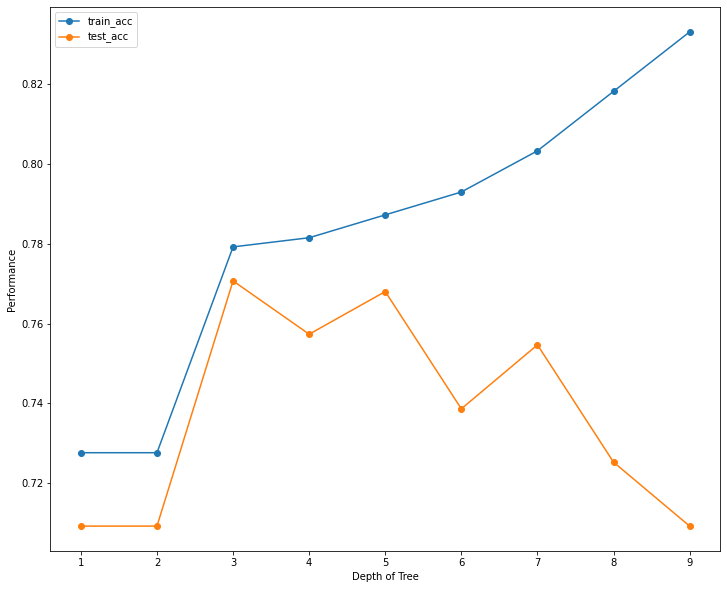

In [ ]:
plt.figure(figsize=(12,10))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['test_acc'], marker='o')
plt.xlabel('Depth of Tree')
plt.ylabel('Performance')
plt.legend(['train_acc', 'test_acc'])

In [ ]:
dt_model2 = DecisionTreeClassifier(max_depth=4, criterion = 'entropy',min_samples_split = 3, min_samples_leaf=3)

In [ ]:
dt_model2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=3,
                       min_samples_split=3)

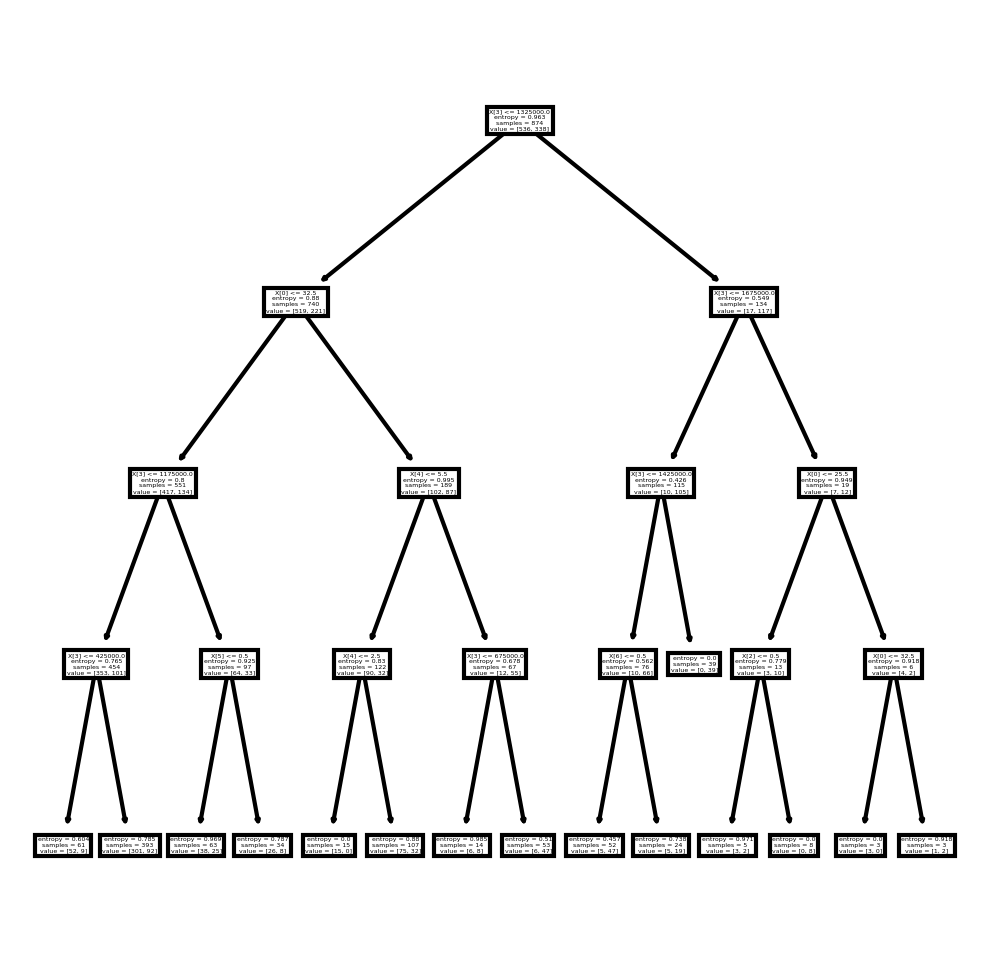

In [ ]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(dt_model2);

In [ ]:
eval_classification2(dt_model2)

Accuracy (Test Set): 0.76
Accuracy (Train Set): 0.78
Precision (Test Set): 0.88
Precision (Train Set): 0.88
Recall (Test Set): 0.43
Recall (Train Set): 0.50
F1-Score (Test Set): 0.58
F1-Score (Train Set): 0.64
Test score:0.7573333333333333
Train score: 0.7814645308924485
[[221   9]
 [ 82  63]]



Dari hasil hyperparameter tuning, terlihat bahwa score Train>Test, data sudah best fit dengan gap antara train dan test tipis

# Feature Importance


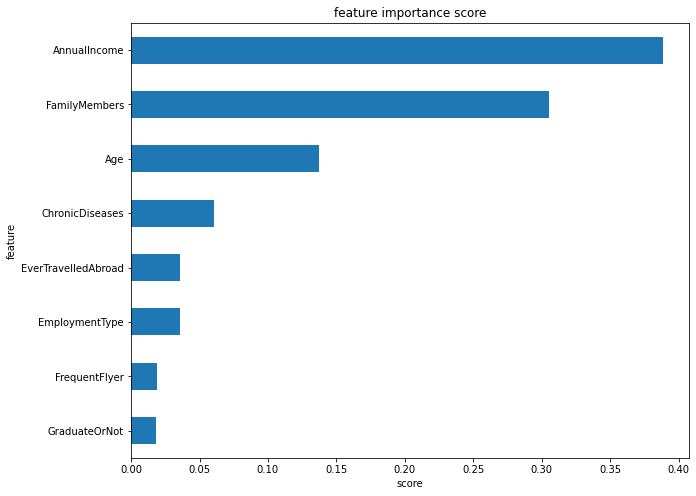

In [ ]:
show_feature_importance(dt_model)

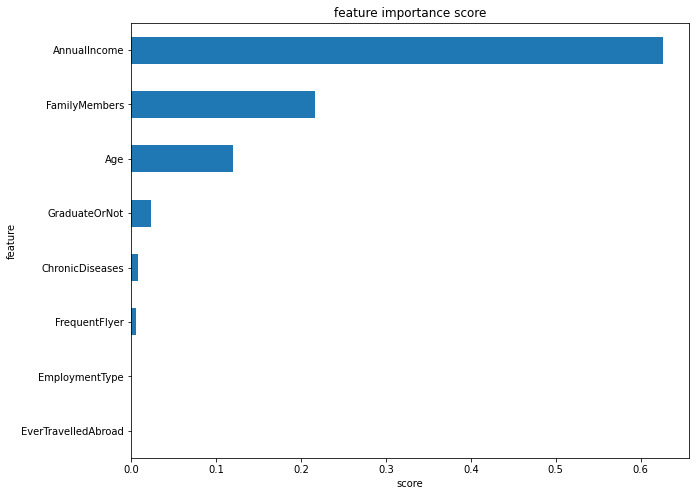

In [ ]:
show_feature_importance(dt_model2)